# Analyser for workflow logger: wflogger

Example code to analyse logs

In [29]:
import psycopg2
import os

HOME = os.environ["HOME"]
USER = os.path.basename(HOME)
creds = open(f"{HOME}/.wflogger").read()

In [30]:
conn = psycopg2.connect(creds)
curs = conn.cursor()
query = f"SELECT * FROM workflow_logs WHERE user_id = '{USER}'"
res = curs.execute(query)
curs.fetchone()

(1,
 'astephen',
 'sci5.jasmin.ac.uk',
 'wf1',
 'v1.0',
 1,
 'start',
 1,
 datetime.datetime(2022, 3, 17, 14, 31, 18, 970042),
 '',
 -999)

In [31]:
creds_dict = dict([item.split("=") for item in creds.split()])
pg_url = "postgresql://{dbname}:{password}@{host}:{port}/{dbname}" \
         .format(**creds_dict)

import pandas as pd
df = pd.read_sql(query, pg_url)

In [32]:
df.head()

,id,user_id,hostname,workflow,tag,stage_number,stage,iteration,date_time,comment,flag
0,1,astephen,sci5.jasmin.ac.uk,wf1,v1.0,1,start,1,2022-03-17 14:31:18.970042,,-999
1,2,astephen,sci5.jasmin.ac.uk,wf1,v1.0,2,read,1,2022-03-17 14:31:22.070042,,-999
2,3,astephen,sci5.jasmin.ac.uk,wf1,v1.0,3,process,1,2022-03-17 14:31:30.270042,,-999
3,4,astephen,sci5.jasmin.ac.uk,wf1,v1.0,4,summarise,1,2022-03-17 14:31:35.170042,,-999
4,5,astephen,sci5.jasmin.ac.uk,wf1,v1.0,1,start,2,2022-03-17 14:31:38.070042,,-999


In [33]:
len(df)

4000

In [34]:
df.describe()

,id,stage_number,iteration,flag
count,4000.000000,4000.000000,4000.000000,4000.0
mean,2000.500000,2.500000,130.500000,-999.0
std,1154.844867,1.118174,80.217571,0.0
min,1.000000,1.000000,1.000000,-999.0
25%,1000.750000,1.750000,63.000000,-999.0
50%,2000.500000,2.500000,125.500000,-999.0
75%,3000.250000,3.250000,188.000000,-999.0
max,4000.000000,4.000000,300.000000,-999.0


In [35]:
v_1 = df[df["tag"] == "v1.0"]
v_2 = df[df["tag"] == "v2.0"]

In [36]:
len(v_1), len(v_2)

(800, 1200)

In [37]:
v_1.groupby("stage_number").describe()

id                                                      \
              count   mean         std  min    25%    50%    75%    max   
stage_number                                                              
1             200.0  399.0  231.516738  1.0  200.0  399.0  598.0  797.0   
2             200.0  400.0  231.516738  2.0  201.0  400.0  599.0  798.0   
3             200.0  401.0  231.516738  3.0  202.0  401.0  600.0  799.0   
4             200.0  402.0  231.516738  4.0  203.0  402.0  601.0  800.0   

             iteration         ...                  flag                     \
                 count   mean  ...     75%    max  count   mean  std    min   
stage_number                   ...                                            
1                200.0  100.5  ...  150.25  200.0  200.0 -999.0  0.0 -999.0   
2                200.0  100.5  ...  150.25  200.0  200.0 -999.0  0.0 -999.0   
3                200.0  100.5  ...  150.25  200.0  200.0 -999.0  0.0 -999.0   
4                200.0  100.5  ...  150.25  200.0  200.0 -999.0  0.0 -999.0   

                                          
                25%    50%    75%    max  
stage_number                              
1            -999.0 -999.0 -999.0 -999.0  
2            -999.0 -999.0 -999.0 -999.0  
3            -999.0 -999.0 -999.0 -999.0  
4            -999.0 -999.0 -999.0 -999.0  

[4 rows x 24 columns]

In [38]:
previous_row = df.iloc[0]
row = df.iloc[1]
compare_columns = ["id", "user_id", "hostname", "workflow", "tag", "iteration"]

def rows_match(row1, row2, compare_columns=None):
    if compare_columns is None:
        compare_columns = ["id", "user_id", "hostname", "workflow", "tag", "iteration"]

    return all(row1[compare_columns] == row2[compare_columns])

rows_match(df.iloc[0], df.iloc[1], compare_columns)
# previous_row.copy().drop(inplace=True, columns=match_drops) == \
#     row.copy().drop(inplace=True, columns=match_drops)

False

In [39]:
df.iloc[:3].sort_values(["user_id", "workflow", "tag", "stage_number"])

,id,user_id,hostname,workflow,tag,stage_number,stage,iteration,date_time,comment,flag
0,1,astephen,sci5.jasmin.ac.uk,wf1,v1.0,1,start,1,2022-03-17 14:31:18.970042,,-999
1,2,astephen,sci5.jasmin.ac.uk,wf1,v1.0,2,read,1,2022-03-17 14:31:22.070042,,-999
2,3,astephen,sci5.jasmin.ac.uk,wf1,v1.0,3,process,1,2022-03-17 14:31:30.270042,,-999


In [40]:
df.iloc[:3]

,id,user_id,hostname,workflow,tag,stage_number,stage,iteration,date_time,comment,flag
0,1,astephen,sci5.jasmin.ac.uk,wf1,v1.0,1,start,1,2022-03-17 14:31:18.970042,,-999
1,2,astephen,sci5.jasmin.ac.uk,wf1,v1.0,2,read,1,2022-03-17 14:31:22.070042,,-999
2,3,astephen,sci5.jasmin.ac.uk,wf1,v1.0,3,process,1,2022-03-17 14:31:30.270042,,-999


In [41]:
sort_by = ["iteration", "stage_number"]
compare_columns = ["user_id", "hostname", "workflow", "tag", "iteration"]

def add_duration_column(df, sort_by=None):
    if sort_by is None:
        sort_by = ["iteration", "stage_number"]
        
    previous_row = None
    new_rows = []
    
    for i, row in df.sort_values(sort_by).iterrows():

        if previous_row is not None and rows_match(previous_row, row, compare_columns):
            duration = (row["date_time"] - previous_row["date_time"]).total_seconds()
        else:
            duration = 0
            
        previous_row = row.copy()
        row["duration"] = duration
        new_rows.append(row)
        
    print(f"Converted {len(new_rows)} records.")
    return pd.DataFrame(new_rows, columns=list(df.columns) + ["duration"]).reset_index(drop=True)
        
v_1_new = add_duration_column(v_1, sort_by=sort_by)
v_2_new = add_duration_column(v_2, sort_by=sort_by)

Converted 800 records.
Converted 1200 records.


In [42]:
v_1_new.head(5)

,id,user_id,hostname,workflow,tag,stage_number,stage,iteration,date_time,comment,flag,duration
0,1,astephen,sci5.jasmin.ac.uk,wf1,v1.0,1,start,1,2022-03-17 14:31:18.970042,,-999,0.0
1,2,astephen,sci5.jasmin.ac.uk,wf1,v1.0,2,read,1,2022-03-17 14:31:22.070042,,-999,3.1
2,3,astephen,sci5.jasmin.ac.uk,wf1,v1.0,3,process,1,2022-03-17 14:31:30.270042,,-999,8.2
3,4,astephen,sci5.jasmin.ac.uk,wf1,v1.0,4,summarise,1,2022-03-17 14:31:35.170042,,-999,4.9
4,5,astephen,sci5.jasmin.ac.uk,wf1,v1.0,1,start,2,2022-03-17 14:31:38.070042,,-999,0.0


<AxesSubplot:xlabel='stage'>

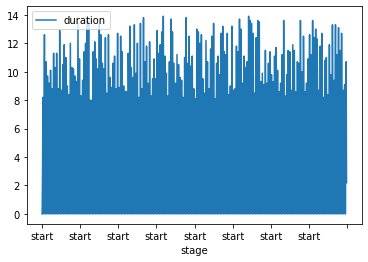

In [43]:
v_1_new.plot(x="stage", y="duration")

/tmp/ipykernel_5254/425243592.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(get_stage_labels(df))


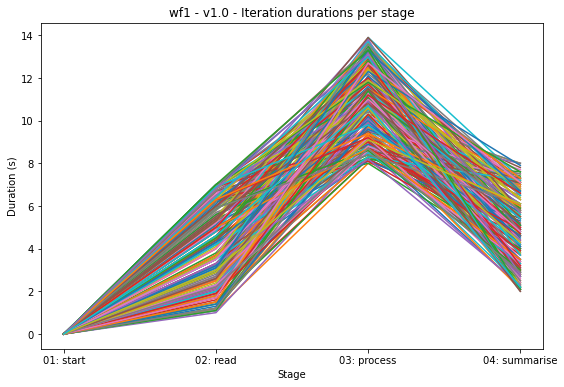

/tmp/ipykernel_5254/425243592.py:30: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(get_stage_labels(df))


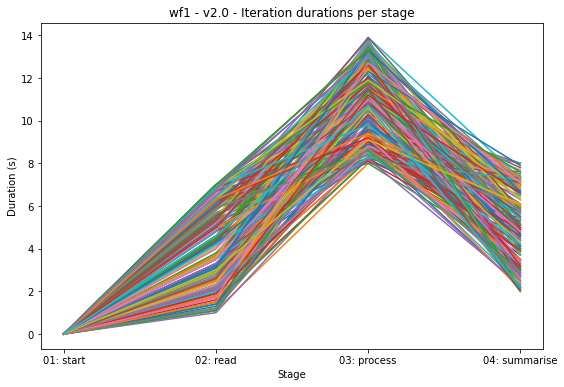

In [44]:
#v_1_new.groupby("iteration").plot(figsize=(9, 6)) #, x="stage", y="duration")
import matplotlib.pyplot as plt

def get_stage_labels(df):
    stages = []
    
    for i, row in df.iterrows():
        stage_number = row.stage_number
        stage = row.stage
        
        stage_label = f"{stage_number:02d}: {stage}"
        if stage_label in stages:
            continue
        
        stages.append(stage_label)

    return stages


def plot_stage_durations_by_iteration(df):
    fig, ax = plt.subplots(figsize=(9, 6))

    for key, grp in v_1_new.groupby(['iteration']):
        ax.plot(grp['stage'], grp['duration'], label=key)
    #     if key > 5: break

    #ax.legend()
    ax.set_ylabel("Duration (s)")
    ax.set_xlabel("Stage")
    ax.set_xticklabels(get_stage_labels(df))
    
    r1 = df.iloc[0]
    plt.title(f"{r1.workflow} - {r1.tag} - Iteration durations per stage")
    plt.show()
    
plot_stage_durations_by_iteration(v_1_new)
plot_stage_durations_by_iteration(v_2_new)

13.9


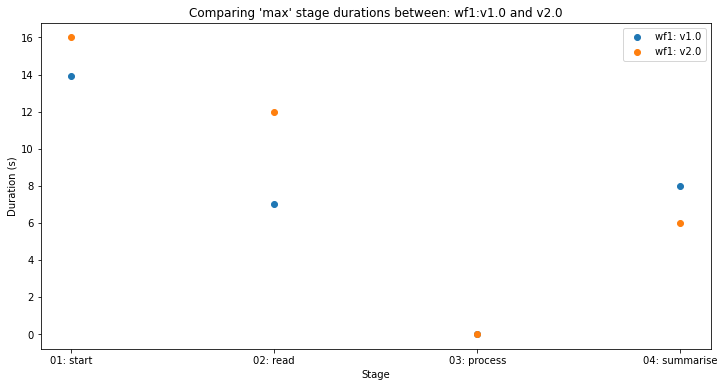

In [46]:
def plot_comparison_of_two_workflow_tags(df1, df2, stat="mean"):
    fig, ax = plt.subplots(figsize=(12, 6))
    grp_1 = df1.groupby("stage")
    grp_2 = df2.groupby("stage")

    max_duration = max(grp_1["duration"].max())
    print(max_duration)
    stages = get_stage_labels(df1)
    durations = stages

#     v_1_new.groupby("stage")["duration"].agg("mean")

    r1 = df1.iloc[0]
    r2 = df2.iloc[0]
    
    ax.scatter(durations, grp_1["duration"].agg(stat), label=f"{r1.workflow}: {r1.tag}")
    ax.scatter(durations, grp_2["duration"].agg(stat), label=f"{r2.workflow}: {r2.tag}")
    ax.legend()
    
    plt.title(f"Comparing '{stat}' stage durations between: {r1.workflow}:" 
              f"{r1.tag} and {r2.tag}")
              
    ax.set_ylabel("Duration (s)")
    ax.set_xlabel("Stage")
       
    plt.show()
              
plot_comparison_of_two_workflow_tags(v_1_new, v_2_new, "max")

## Compare ranges of hostnames by mean runtime for each stage


In [21]:
# Useful reference: https://matplotlib.org/3.1.1/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py


Good examples for more plots!

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html


In [48]:
def plot_bar_chart_comparing_tags(df1, df2, legend_position=None):
    data_dict = {}
    stage_names = get_stage_labels(df1)
    tags = [_df.iloc[0].tag for _df in (df1, df2)]

    for i, sn in enumerate(sorted(df1["stage_number"].unique())):
        data_dict[stage_names[i]] = [_df[_df["stage_number"] == sn].groupby("stage_number")["duration"].agg("max").values[0] 
                                     for _df in (df1, df2)]

    index = tags
    plot_df = pd.DataFrame(data_dict, index=index)
    ax = plot_df.plot.bar(rot=0)
    
    if legend_position:
        ax.legend(loc=legend_position)

    

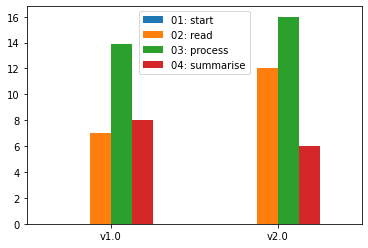

In [49]:
plot_bar_chart_comparing_tags(v_1_new, v_2_new)

In [50]:
def select_records(df, user_id, workflow, tag):
    return df[(df.user_id == user_id) &
              (df.workflow == workflow) &
              (df.tag == tag)]

d1 = select_records(df, "astephen", "my-model-1", "idl-version")
d2 = select_records(df, "astephen", "my-model-1", "python-version")

In [51]:
d1.head()

,id,user_id,hostname,workflow,tag,stage_number,stage,iteration,date_time,comment,flag
2000,2001,astephen,host466.jc.rl.ac.uk,my-model-1,idl-version,1,start,1,2022-03-18 15:05:36.588156,,-999
2001,2002,astephen,host466.jc.rl.ac.uk,my-model-1,idl-version,2,read,1,2022-03-18 15:05:38.188156,,-999
2002,2003,astephen,host466.jc.rl.ac.uk,my-model-1,idl-version,3,process,1,2022-03-18 15:05:49.888156,,-999
2003,2004,astephen,host466.jc.rl.ac.uk,my-model-1,idl-version,4,summarise,1,2022-03-18 15:05:55.488156,,-999
2004,2005,astephen,host498.jc.rl.ac.uk,my-model-1,idl-version,1,start,2,2022-03-18 15:05:56.788156,,-999


In [52]:
d1 = add_duration_column(d1)

Converted 800 records.


In [53]:
d1.head()

,id,user_id,hostname,workflow,tag,stage_number,stage,iteration,date_time,comment,flag,duration
0,2001,astephen,host466.jc.rl.ac.uk,my-model-1,idl-version,1,start,1,2022-03-18 15:05:36.588156,,-999,0.0
1,2002,astephen,host466.jc.rl.ac.uk,my-model-1,idl-version,2,read,1,2022-03-18 15:05:38.188156,,-999,1.6
2,2003,astephen,host466.jc.rl.ac.uk,my-model-1,idl-version,3,process,1,2022-03-18 15:05:49.888156,,-999,11.7
3,2004,astephen,host466.jc.rl.ac.uk,my-model-1,idl-version,4,summarise,1,2022-03-18 15:05:55.488156,,-999,5.6
4,2005,astephen,host498.jc.rl.ac.uk,my-model-1,idl-version,1,start,2,2022-03-18 15:05:56.788156,,-999,0.0


In [54]:
d2 = add_duration_column(d2)

Converted 1200 records.


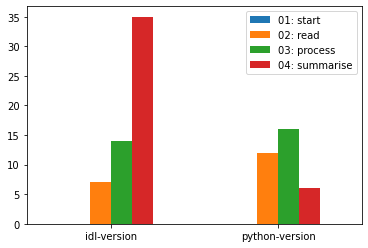

In [55]:
plot_bar_chart_comparing_tags(d1, d2)

<AxesSubplot:ylabel='stage'>

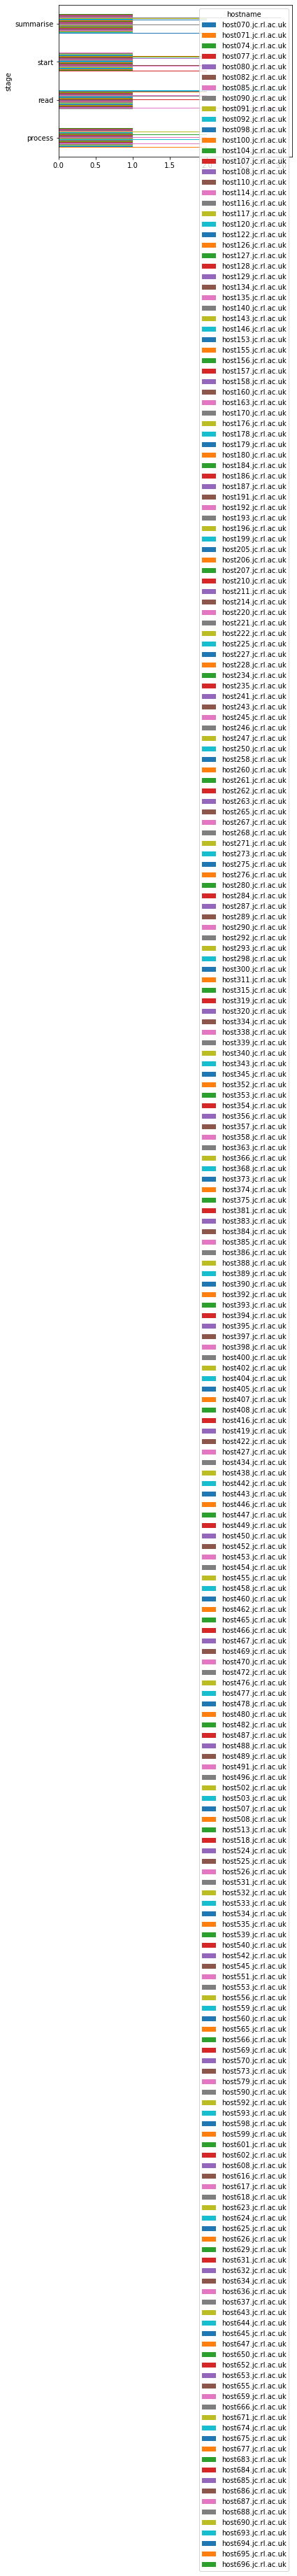

In [56]:
d2.groupby("stage")["hostname"].value_counts().unstack().plot(kind="barh")